In [1]:
# import packages
import warnings
from matplotlib import pyplot as plt

from qdl_klayout_extension.core.shapes import SimpleCross
from qdl_klayout_extension.core.coordinates import Coordinates
from qdl_klayout_extension.core.layout import Layout
from qdl_klayout_extension.core.patterns import Pattern
from qdl_klayout_extension.visualize import plot_polygon, plot_pattern

warnings.filterwarnings("ignore")

In [2]:
"""
Create a layout.
This package uses a default database unit defined in "constants" as DBU_UM, which defaults to 0.001.
All defined objects in this package will automatically use the DBU_UM provided in "constants".
If you want to use a different one, update it directly before creating any new objects.
"""
layout = Layout()

"""
Create a layer. For this simple case we will only use one layer, with index 1 and datatype 0.
Traditionally, KLayout uses datatype 0 for regular shapes and datatype 1 for cutouts,
but you can define your own datatypes to represent other types of shapes or to differentiate between different variations of the same shape.
"""
layer_idx = 1
layer = layout.layer(layer_idx, 0)

In [3]:
"""
Create a cell with a name of your choice.
Usually, you create a shape (e.g. polygon) once, and then you put it in a cell,
and you repeat it as many times as needs, as long as you are not doing a parameter sweep.
"""
base_cell = layout.create_cell('base')

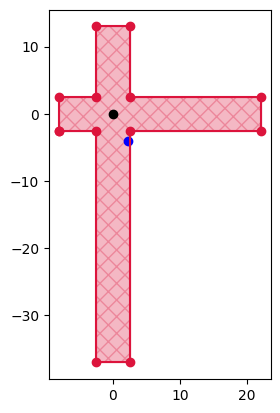

In [4]:
"""
Create a shape. Here we are creating an asymmetric cross.
The cross is defined by a shared width, two lengths (1: vertical and 2: horizontal),
a rotation angle, and two shifts parameters that change the relative location of the rectangles (1: vertical, 2: horizontal).
The reference point will be the crossing point between the two two rectangles defining it.
The rotational angle refers to the overall angle of the structure.
The two rectangles comprising the cross are always perpendicular to each other.

Any shape that inherits from the SimplePolygon class has the following properties you can retrieve easily!
coords -> coordinates of each point, as a CoordinatesList object.
centroid -> The center of the structure
ref_point -> The reference point of the structure (where the relative 0,0 is).  Defaults to centroid, but for the asymmetric cross these two don't overlap.
edge_centers -> The centers points between the coords, as a CoordinatesList object.
edge_lines -> a list of Line objects, defined by a tuple of Coordinates objects.
edge_lengths -> A list of lengths of each edge.
edge_angles -> A list of global angles.
point_angles -> A list of relative angles between two adjacent edges.
"""

ref_point = Coordinates(0, 0)
width = 5
length_1 = 30
length_2 = 50
angle = -90
shift_1 = 7
shift_2 = 12

cross = SimpleCross.from_rectangles(width, length_1, length_2, angle, ref_point, shift_1, shift_2)

"""
You can easily plot a polygon with the visualization function plot_polygon.
"""
plot_polygon(cross, units='uu')  # in user defined units (um is the default). Use dbu for database units
plt.scatter(ref_point.x_uu, ref_point.y_uu, color='k')
plt.scatter(cross.centroid.x_uu, cross.centroid.y_uu, color='b')  # the centroid for an asymmetric cross in not the same as with the ref point!


In [5]:
"""
Use the added method easy_insert to easily insert multiple shapes in a cell in a specific layer.
Alternatively, you need to use the Cell.cell.shapes(layer).insert(element) method, where element needs to be a klayout element.
"""
base_cell.easy_insert(layer, [cross])
# base_cell.shapes(layer).insert(cross.klayout_simple_polygon)


In [6]:
"""
To save this in a gds file, we simple call the write function from the layout
"""
layout.write('example_2_cross.gds')


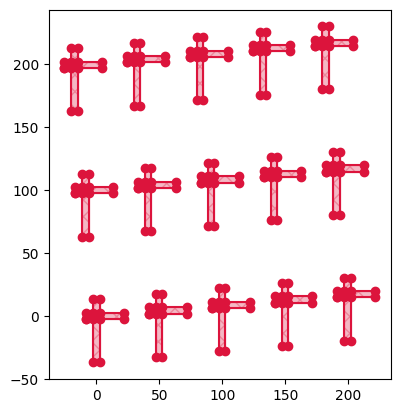

In [7]:
"""
We can now create a cross grid!
First we create a Pattern object, that takes as inputs global displacement, the horizontal and vertical distances between the repeated cell,
a rotation angle of the pattern, and the repetition number in each direction.
"""
dist_x = 50
dist_y = 100
n_x = 5
n_y = 3
angle = 5
global_displacement = Coordinates(0, 0)
pattern = Pattern(dist_x, dist_y, n_x, n_y, angle, global_displacement)

"""
We can now visualize the pattern, even if we don't care about the actual repeated shape! In this case, we will plot the cross grid.
"""
plot_pattern(pattern, cross)


In [8]:
"""
Now we need to retrieve the cell array instance. We can easily do that with the pattern method get_cell_array_instance.
This method takes as an argument the cell that we are supposed to repeat (the base cell here).
"""

array_inst = pattern.get_cell_array_instance(base_cell)

"""
We create a new cell named grid and we insert the array instance in it (we do not use the layer-based method for array instances)
"""
grid_cell = layout.create_cell('grid')
grid_cell.insert(array_inst)


cell_index=0 r0 0,0 array=(49810,4358,-8716,99619 5x3)

In [9]:
layout.write('example_2_cross_grid.gds')
